In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data

In [2]:
df = pd.read_csv("/Users/anastyarachmaindiarto/Downloads/kaggle/loan_approval.csv")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


Setelah membaca data, berikut merupakan deskripsi dari masing-masing kolom dan tipe data pada DataFrame tersebut.

| Nama Kolom                              | Deskripsi                                                  | Tipe Data       |
| ---------------------------------- | ---------------------------------------------------------- | ----------- |
| **person_age**                     | Usia individu                                              | Float       |
| **person_gender**                  | Jenis kelamin individu                                     | Kategorikal |
| **person_education**               | Tingkat pendidikan terakhir                                | Kategorikal |
| **person_income**                  | Pendapatan tahunan                                         | Float       |
| **person_emp_exp**                 | Lama pengalaman kerja (tahun)                              | Integer     |
| **person_home_ownership**          | Status kepemilikan rumah (misal: sewa, milik sendiri, KPR) | Kategorikal |
| **loan_amnt**                      | Jumlah pinjaman yang diajukan                              | Float       |
| **loan_intent**                    | Tujuan pengajuan pinjaman                                  | Kategorikal |
| **loan_int_rate**                  | Suku bunga pinjaman                                        | Float       |
| **loan_percent_income**            | Persentase jumlah pinjaman terhadap pendapatan tahunan     | Float       |
| **cb_person_cred_hist_length**     | Lama riwayat kredit (tahun)                                | Float       |
| **credit_score**                   | Skor kredit individu                                       | Integer     |
| **previous_loan_defaults_on_file** | Indikator pernah gagal bayar pinjaman sebelumnya           | Kategorikal |
| **loan_status (variabel target)**  | Status persetujuan pinjaman: 1 = disetujui; 0 = ditolak    | Integer     |
---

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Dataset ini memiliki **45.000 baris** dan **14 kolom** dengan **9 tipe data numerikal (6 float dan 3 integer)** serta **5 tipe data kategorikal**.

In [4]:
df.shape

(45000, 14)

In [5]:
df.columns.to_list()

['person_age',
 'person_gender',
 'person_education',
 'person_income',
 'person_emp_exp',
 'person_home_ownership',
 'loan_amnt',
 'loan_intent',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'previous_loan_defaults_on_file',
 'loan_status']

In [6]:
df.describe().round(2)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00
mean,27.76,80319.05,5.41,9583.16,11.01,0.14,5.87,632.61,0.22
std,6.05,80422.50,6.06,6314.89,2.98,0.09,3.88,50.44,0.42
min,20.00,8000.00,0.00,500.00,5.42,0.00,2.00,390.00,0.00
25%,24.00,47204.00,1.00,5000.00,8.59,0.07,3.00,601.00,0.00
50%,26.00,67048.00,4.00,8000.00,11.01,0.12,4.00,640.00,0.00
75%,30.00,95789.25,8.00,12237.25,12.99,0.19,8.00,670.00,0.00
max,144.00,7200766.00,125.00,35000.00,20.00,0.66,30.00,850.00,1.00


In [7]:
df.describe(include="object")

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


# Data Cleaning

## Memeriksa konsistensi data

In [8]:
# Mengetahui isi data dan nilai unik untuk tipe data kategorikal

cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns

cat_values = []

for col in cat_cols:
    cat_values.append({
        "column": col,
        "unique_values": df[col].dropna().unique().tolist(),
        "n_unique": df[col].nunique(dropna=True)
    })

cat_values_df = pd.DataFrame(cat_values)

pd.set_option("display.max_colwidth", 100)
cat_values_df

,column,unique_values,n_unique
0,person_gender,"[female, male]",2
1,person_education,"[Master, High School, Bachelor, Associate, Doctorate]",5
2,person_home_ownership,"[RENT, OWN, MORTGAGE, OTHER]",4
3,loan_intent,"[PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIMPROVEMENT, DEBTCONSOLIDATION]",6
4,previous_loan_defaults_on_file,"[No, Yes]",2


Pada pengecekan **konsistensi data kategorikal**, tidak ditemukan kesalahan penulisan (*typo*) maupun perbedaan penggunaan huruf kapital. Namun, seluruh nilai tetap diubah agar setiap kategori memiliki **huruf pertama kapital** guna meningkatkan **konsistensi format data**.

In [9]:
# Proporsi data kategorikal

cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns

result = []

for col in cat_cols:
    counts = df[col].value_counts(dropna=False)
    percentages = df[col].value_counts(normalize=True, dropna=False) * 100
    
    temp_df = pd.DataFrame({
        "column": col,
        "category": counts.index,
        "count": counts.values,
        "percentage (%)": percentages.round(2).astype(str) + "%"
    })
    
    result.append(temp_df)

categorical_distribution = pd.concat(result, ignore_index=True)

categorical_distribution

,column,category,count,percentage (%)
0,person_gender,male,24841,55.2%
1,person_gender,female,20159,44.8%
2,person_education,Bachelor,13399,29.78%
3,person_education,Associate,12028,26.73%
4,person_education,High School,11972,26.6%
5,person_education,Master,6980,15.51%
6,person_education,Doctorate,621,1.38%
7,person_home_ownership,RENT,23443,52.1%
8,person_home_ownership,MORTGAGE,18489,41.09%
9,person_home_ownership,OWN,2951,6.56%


In [10]:
# Mengetahui isi data numerik satu persatu
num_cols = df.select_dtypes(include=["number"]).columns

num_values = {}

for col in num_cols:
    num_values[col] = df[col].dropna().unique().tolist()

num_values

{'person_age': [22.0,
  21.0,
  25.0,
  23.0,
  24.0,
  26.0,
  144.0,
  123.0,
  20.0,
  32.0,
  34.0,
  29.0,
  33.0,
  28.0,
  35.0,
  31.0,
  27.0,
  30.0,
  36.0,
  40.0,
  50.0,
  45.0,
  37.0,
  39.0,
  44.0,
  43.0,
  41.0,
  46.0,
  38.0,
  47.0,
  42.0,
  48.0,
  49.0,
  58.0,
  65.0,
  51.0,
  53.0,
  66.0,
  61.0,
  54.0,
  57.0,
  59.0,
  62.0,
  60.0,
  55.0,
  52.0,
  64.0,
  70.0,
  78.0,
  69.0,
  56.0,
  73.0,
  63.0,
  94.0,
  80.0,
  84.0,
  76.0,
  67.0,
  116.0,
  109.0],
 'person_income': [71948.0,
  12282.0,
  12438.0,
  79753.0,
  66135.0,
  12951.0,
  93471.0,
  95550.0,
  100684.0,
  12739.0,
  102985.0,
  13113.0,
  114860.0,
  130713.0,
  138998.0,
  600891.0,
  144943.0,
  111369.0,
  136628.0,
  14283.0,
  195718.0,
  165792.0,
  79255.0,
  13866.0,
  97420.0,
  82443.0,
  14288.0,
  14293.0,
  79054.0,
  14988.0,
  14858.0,
  144855.0,
  114645.0,
  368115.0,
  361076.0,
  15150.0,
  58868.0,
  78026.0,
  90785.0,
  86811.0,
  75503.0,
  15082.0,
  36129

In [11]:
summary = pd.DataFrame({
    "dtype": df.dtypes.astype(str),
    "n_unique": df.nunique(),
    "unique_values_sample": [
        df[col].dropna().unique()[:100] for col in df.columns
    ]
})

summary

,dtype,n_unique,unique_values_sample
person_age,float64,60,"[22.0, 21.0, 25.0, 23.0, 24.0, 26.0, 144.0, 123.0, 20.0, 32.0, 34.0, 29.0, 33.0, 28.0, 35.0, 31...."
person_gender,object,2,"[female, male]"
person_education,object,5,"[Master, High School, Bachelor, Associate, Doctorate]"
person_income,float64,33989,"[71948.0, 12282.0, 12438.0, 79753.0, 66135.0, 12951.0, 93471.0, 95550.0, 100684.0, 12739.0, 1029..."
person_emp_exp,int64,63,"[0, 3, 1, 5, 4, 2, 7, 6, 125, 8, 121, 101, 100, 12, 10, 9, 14, 13, 11, 15, 16, 17, 19, 28, 25, 1..."
person_home_ownership,object,4,"[RENT, OWN, MORTGAGE, OTHER]"
loan_amnt,float64,4483,"[35000.0, 1000.0, 5500.0, 2500.0, 1600.0, 4500.0, 30000.0, 1750.0, 34800.0, 34000.0, 1500.0, 339..."
loan_intent,object,6,"[PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIMPROVEMENT, DEBTCONSOLIDATION]"
loan_int_rate,float64,1302,"[16.02, 11.14, 12.87, 15.23, 14.27, 7.14, 12.42, 11.11, 8.9, 14.74, 10.37, 8.63, 7.9, 18.39, 10...."
loan_percent_income,float64,64,"[0.49, 0.08, 0.44, 0.53, 0.19, 0.37, 0.35, 0.13, 0.34, 0.3, 0.27, 0.25, 0.05, 0.24, 0.31, 0.26, ..."


Secara konsep, variabel **person_age** merepresentasikan usia atau jumlah tahun hidup seseorang sehingga nilainya seharusnya berupa **bilangan bulat (integer)**, bukan pecahan. Oleh karena itu, tipe data **person_age** akan diubah dari *float* menjadi **integer**.

In [12]:
# Mengetahui jumlah missing value pada setiap kolom
missing_df = pd.DataFrame({
    "Jumlah Missing Value": df.isna().sum(),
    "Persentase Missing Value": (df.isna().mean() * 100).round(2).astype(str) + "%"
})

# Menambahkan header untuk nama kolom
missing_df.index.name = "Nama Kolom"

missing_df

,Jumlah Missing Value,Persentase Missing Value
Nama Kolom,,
person_age,0,0.0%
person_gender,0,0.0%
person_education,0,0.0%
person_income,0,0.0%
person_emp_exp,0,0.0%
person_home_ownership,0,0.0%
loan_amnt,0,0.0%
loan_intent,0,0.0%
loan_int_rate,0,0.0%


Tidak ditemukan **missing value** pada dataset, sehingga seluruh data dapat langsung digunakan untuk proses analisis tanpa perlu penanganan nilai kosong.

In [13]:
# Memeriksa duplikasi data 
print(df.duplicated().sum())

0


Tidak ditemukan **data duplikat** pada dataset, sehingga setiap baris data merepresentasikan observasi yang unik dan dapat langsung digunakan dalam proses analisis.

In [14]:
# Memeriksa outlier
num_cols = df.select_dtypes(include=["number"]).columns

# Hitung Q1, Q3, IQR
q1 = df[num_cols].quantile(0.25)
q3 = df[num_cols].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Identifikasi outlier
outlier_mask = (df[num_cols] < lower) | (df[num_cols] > upper)
outlier_values = df[outlier_mask] # Untuk melihat nilai outlier
jumlah_outlier = outlier_mask.sum(axis=0)

# Total jumlah data (baris)
total_data = len(df)

# Hitung persentase outlier per kolom
persentase_outlier = (jumlah_outlier / total_data * 100).round(2).astype(str) + "%"

# Gabungkan jumlah & persentase ke dalam DataFrame
outlier_summary = pd.DataFrame({
    "Jumlah Outlier": jumlah_outlier,
    "Persentase Outlier (%)": persentase_outlier
})

outlier_summary

,Jumlah Outlier,Persentase Outlier (%)
Nama Kolom,,
person_age,2188,4.86%
person_income,2218,4.93%
person_emp_exp,1724,3.83%
loan_amnt,2348,5.22%
loan_int_rate,124,0.28%
loan_percent_income,744,1.65%
cb_person_cred_hist_length,1366,3.04%
credit_score,467,1.04%
loan_status,10000,22.22%


Pada tahap eksplorasi data ditemukan beberapa outlier pada variabel numerik. Dalam konteks *loan approval*, nilai ekstrem tidak selalu merupakan kesalahan.
Sebagian nilai memang tidak wajar (misalnya usia terlalu tinggi), tetapi sebagian lain justru menggambarkan perilaku finansial berisiko yang penting untuk dianalisis oleh model.
Oleh karena itu, outlier tidak langsung dihapus, melainkan diperlakukan berbeda sesuai konteks bisnisnya.

**Tabel Penanganan Outlier**

| Variabel                       | Jenis Outlier                  | Penanganan                            | Penjelasan                                                              |
| ------------------------------ | ------------------------------ | ------------------------------------- | ---------------------------------------------------------------------------------------- |
| **person_age**                 | Usia terlalu tinggi (>100)     | Dianggap tidak valid → diganti median | Tidak realistis seseorang berusia sangat ekstrem, kemungkinan salah input                |
| **person_income**              | Pendapatan sangat besar        | Transformasi log + pembatasan nilai   | Orang berpenghasilan tinggi itu ada, tapi perlu distabilkan untuk membantu pembacaan distribusi pada proses eksplorasi data. |
| **person_emp_exp**             | Pengalaman kerja melebihi usia | Dianggap tidak valid → imputasi       | Tidak mungkin pengalaman kerja lebih lama dari usia                                      |
| **loan_amnt**                  | Pinjaman sangat besar          | Transformasi log                      | Pinjaman besar adalah kondisi nyata dan penting untuk menilai risiko                     |
| **loan_int_rate**              | Bunga terlalu ekstrem          | Pembatasan nilai (capping)            | Menghindari nilai ekstrem merusak analisis tanpa menghilangkan data                      |
| **loan_percent_income**        | Rasio sangat tinggi            | Dipertahankan + pembatasan ringan     | Ini indikator utama risiko gagal bayar                                                   |
| **cb_person_cred_hist_length** | Lama riwayat kredit ekstrem    | Pembatasan nilai                      | Variasi normal, hanya distabilkan                                                        |
| **credit_score**               | Skor sangat rendah/tinggi      | Dipertahankan                         | Faktor utama penilaian kredit, tidak boleh dihapus                                       |
| **loan_status**                | Tidak termasuk outlier         | Tidak diubah                          | Ini label target, bukan data numerik yang perlu dibersihkan                              |

---

**Ringkasan**

Pendekatan yang digunakan bukan menghapus semua outlier, tetapi:

* Memperbaiki nilai yang tidak masuk akal.
* Mempertahankan perilaku finansial ekstrem.
* Menstabilkan nilai agar dapat membaca pola dengan baik.


In [15]:
df_clean = df.copy()

In [16]:
# 1. person_age
# # Usia dibatasi pada rentang realistis peminjam (18–90 tahun)
# Tujuannya memperbaiki kesalahan input tanpa mengubah struktur distribusi
df_clean["person_age"] = df_clean["person_age"].clip(18, 90)

# 2. person_emp_exp (pengalaman kerja)
# Pengalaman kerja tidak boleh melebihi usia - 15 tahun (asumsi mulai kerja umur ±15–18)
# Juga tidak mungkin >60 tahun pengalaman kerja
# Nilai tidak logis diganti median agar distribusi tetap stabil
median_exp = df_clean["person_emp_exp"].median()
df_clean.loc[df_clean["person_emp_exp"] > df_clean["person_age"] - 15, "person_emp_exp"] = median_exp
df_clean.loc[df_clean["person_emp_exp"] > 60, "person_emp_exp"] = median_exp

# 3. person_income
# Dilakukan transformasi log hanya untuk memperjelas distribusi saat analisis
df_clean["person_income"] = np.log1p(df["person_income"])

# 4. loan_amnt
# Transformasi log agar grafik tidak didominasi nilai besar
df_clean["loan_amnt"] = np.log1p(df["loan_amnt"])

# 5. Fungsi pembatasan nilai ekstrem (capping)
# Digunakan untuk menstabilkan distribusi tanpa menghilangkan data
def cap_outliers(col):
    lower = col.quantile(0.01)   # batas bawah 1%
    upper = col.quantile(0.99)   # batas atas 99%
    return col.clip(lower, upper)

# 6. loan_int_rate, loan_percent_income, cb_person_cred_hist_length
# Nilai terlalu ekstrem dibatasi pada rentang wajar agar analisis tidak bias
cols_to_cap = [
    "loan_int_rate",
    "loan_percent_income",
    "cb_person_cred_hist_length"
]

for c in cols_to_cap:
    df_clean[c] = cap_outliers(df_clean[c])

### Menangani outlier

In [18]:
# Memeriksa outlier
num_cols = df_clean.select_dtypes(include=["number"]).columns

# Hitung Q1, Q3, IQR
q1 = df_clean[num_cols].quantile(0.25)
q3 = df_clean[num_cols].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Identifikasi outlier
outlier_mask = (df_clean[num_cols] < lower) | (df_clean[num_cols] > upper)
outlier_values = df_clean[outlier_mask] # Untuk melihat nilai outlier
jumlah_outlier = outlier_mask.sum(axis=0)

# Total jumlah data (baris)
total_data = len(df_clean)

# Hitung persentase outlier per kolom
persentase_outlier = (jumlah_outlier / total_data * 100).round(2).astype(str) + "%"

# Gabungkan jumlah & persentase ke dalam DataFrame
outlier_summary2 = pd.DataFrame({
    "Jumlah Outlier": jumlah_outlier,
    "Persentase Outlier (%)": persentase_outlier
})

outlier_summary2

,Jumlah Outlier,Persentase Outlier (%)
Nama Kolom,,
person_age,2188,4.86%
person_income,798,1.77%
person_emp_exp,1714,3.81%
loan_amnt,699,1.55%
loan_int_rate,0,0.0%
loan_percent_income,744,1.65%
cb_person_cred_hist_length,1366,3.04%
credit_score,467,1.04%
loan_status,10000,22.22%


In [19]:
num_cols = df_clean.select_dtypes(include=["number"]).columns

num_values = {}

for col in num_cols:
    num_values[col] = df_clean[col].dropna().unique().tolist()

num_values

{'person_age': [22.0,
  21.0,
  25.0,
  23.0,
  24.0,
  26.0,
  90.0,
  20.0,
  32.0,
  34.0,
  29.0,
  33.0,
  28.0,
  35.0,
  31.0,
  27.0,
  30.0,
  36.0,
  40.0,
  50.0,
  45.0,
  37.0,
  39.0,
  44.0,
  43.0,
  41.0,
  46.0,
  38.0,
  47.0,
  42.0,
  48.0,
  49.0,
  58.0,
  65.0,
  51.0,
  53.0,
  66.0,
  61.0,
  54.0,
  57.0,
  59.0,
  62.0,
  60.0,
  55.0,
  52.0,
  64.0,
  70.0,
  78.0,
  69.0,
  56.0,
  73.0,
  63.0,
  80.0,
  84.0,
  76.0,
  67.0],
 'person_income': [11.183712813678275,
  9.415971471539095,
  9.428591977209965,
  11.286702176129095,
  11.099468506932512,
  9.469005495357472,
  11.445417205187468,
  11.467415415338404,
  11.519752110312506,
  9.452501929126154,
  11.542348335643398,
  9.481435640823564,
  11.651477980631476,
  11.780767009407606,
  11.842222017842346,
  13.306170496870108,
  11.88410273990907,
  11.620613270387146,
  11.825024502268935,
  9.566895308714338,
  12.184435236050135,
  12.018495301250445,
  11.280438398652866,
  9.537267195753865,


### Menangani konsistensi data

In [24]:
# Mengubah huruf pertama menjadi kapital pada data kategorikal

# Mengambil semua kolom kategorikal
cat_cols = df_clean.select_dtypes(include=["object", "category"]).columns

# Mengubah konsistensi data
for col in cat_cols:
    df_clean[col] = (
        df_clean[col]
        .astype(str)        # pastikan string
        .str.strip()        # hapus spasi
        .str.lower()        # samakan format
        .str.title()        # kapital huruf pertama
    )

# Menampilkan daftar kategori unik per kolom
unique_categories = {}

for col in cat_cols:
    unique_categories[col] = sorted(df_clean[col].dropna().unique())

print("Nama Kolom:")
for col, values in unique_categories.items():
    print(f"\n{col}:")
    print(values)

Nama Kolom:

person_gender:
['Female', 'Male']

person_education:
['Associate', 'Bachelor', 'Doctorate', 'High School', 'Master']

person_home_ownership:
['Mortgage', 'Other', 'Own', 'Rent']

loan_intent:
['Debtconsolidation', 'Education', 'Homeimprovement', 'Medical', 'Personal', 'Venture']

previous_loan_defaults_on_file:
['No', 'Yes']


In [25]:
# Mengubah tipe data pada variabel person_age menjadi integer
df_clean["person_age"] = df_clean["person_age"].round().astype(int)
df_clean["person_age"].dtype

dtype('int64')

In [26]:
df_clean.head(10)

Nama Kolom,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,Female,Master,11.183713,0,Rent,10.463132,Personal,16.02,0.40,3.0,561,No,1
1,21,Female,High School,9.415971,0,Own,6.908755,Education,11.14,0.08,2.0,504,Yes,0
2,25,Female,High School,9.428592,3,Mortgage,8.612685,Medical,12.87,0.40,3.0,635,No,1
3,23,Female,Bachelor,11.286702,0,Rent,10.463132,Medical,15.23,0.40,2.0,675,No,1
4,24,Male,Master,11.099469,1,Rent,10.463132,Medical,14.27,0.40,4.0,586,No,1
5,21,Female,High School,9.469005,0,Own,7.824446,Venture,7.14,0.19,2.0,532,No,1
6,26,Female,Bachelor,11.445417,1,Rent,10.463132,Education,12.42,0.37,3.0,701,No,1
7,24,Female,High School,11.467415,5,Rent,10.463132,Medical,11.11,0.37,4.0,585,No,1
8,24,Female,Associate,11.519752,3,Rent,10.463132,Personal,8.90,0.35,2.0,544,No,1
9,21,Female,High School,9.452502,0,Own,7.378384,Venture,14.74,0.13,3.0,640,No,1


In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

## EDA

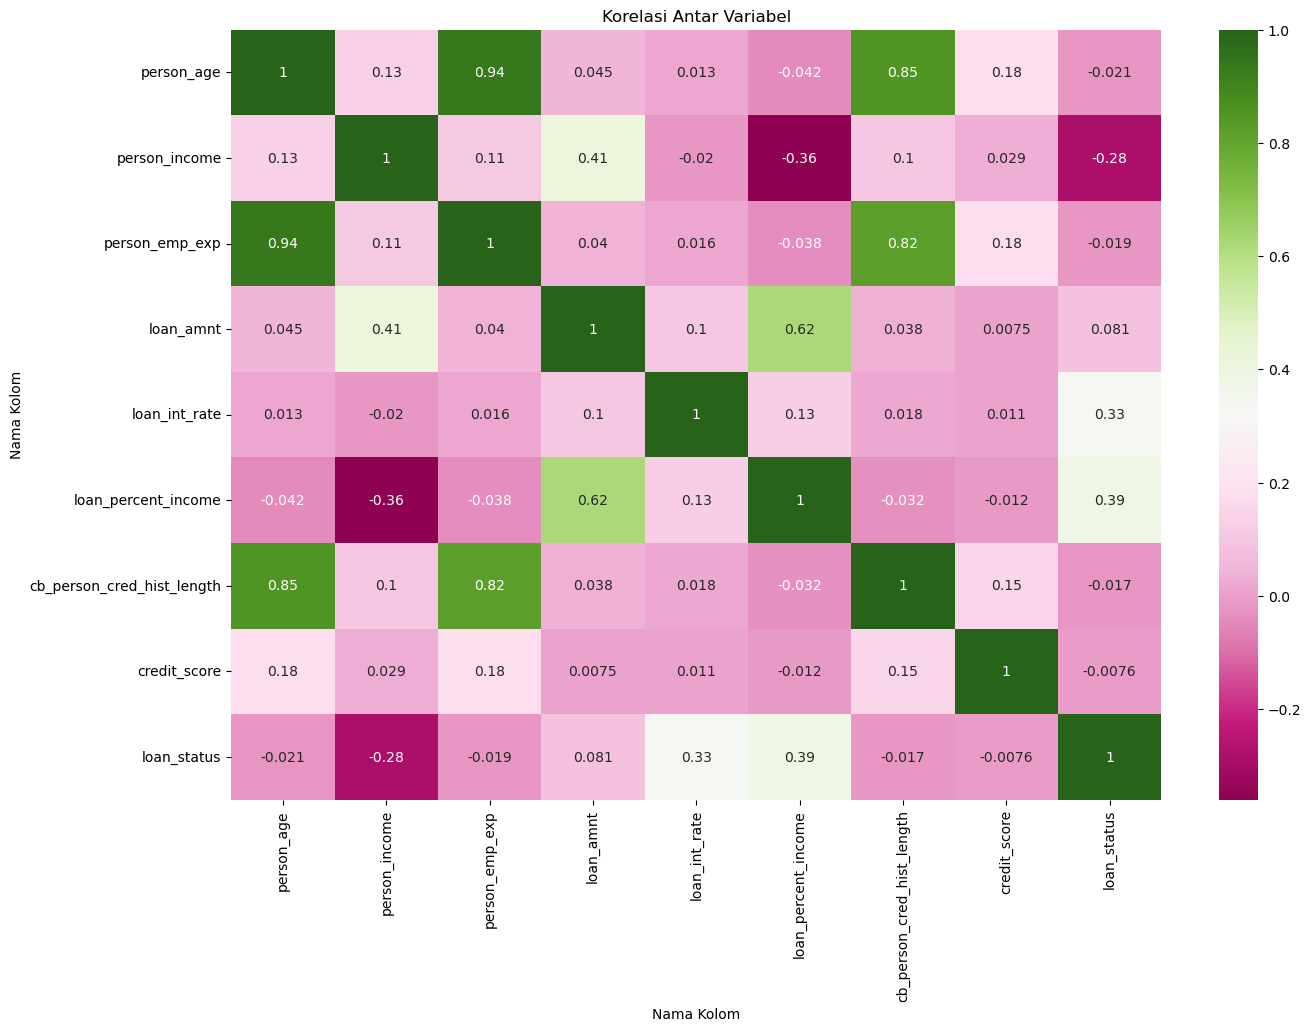

In [28]:
# Menghitung matriks korelasi
hm_data = df_clean.corr(numeric_only=True)

# Memvisualisasikan heatmap untuk melihat korelasi antar variable
plt.figure(figsize=(15,10))
sns.heatmap(hm_data, annot=True,cmap="PiYG")
plt.title("Korelasi Antar Variabel")
plt.show()

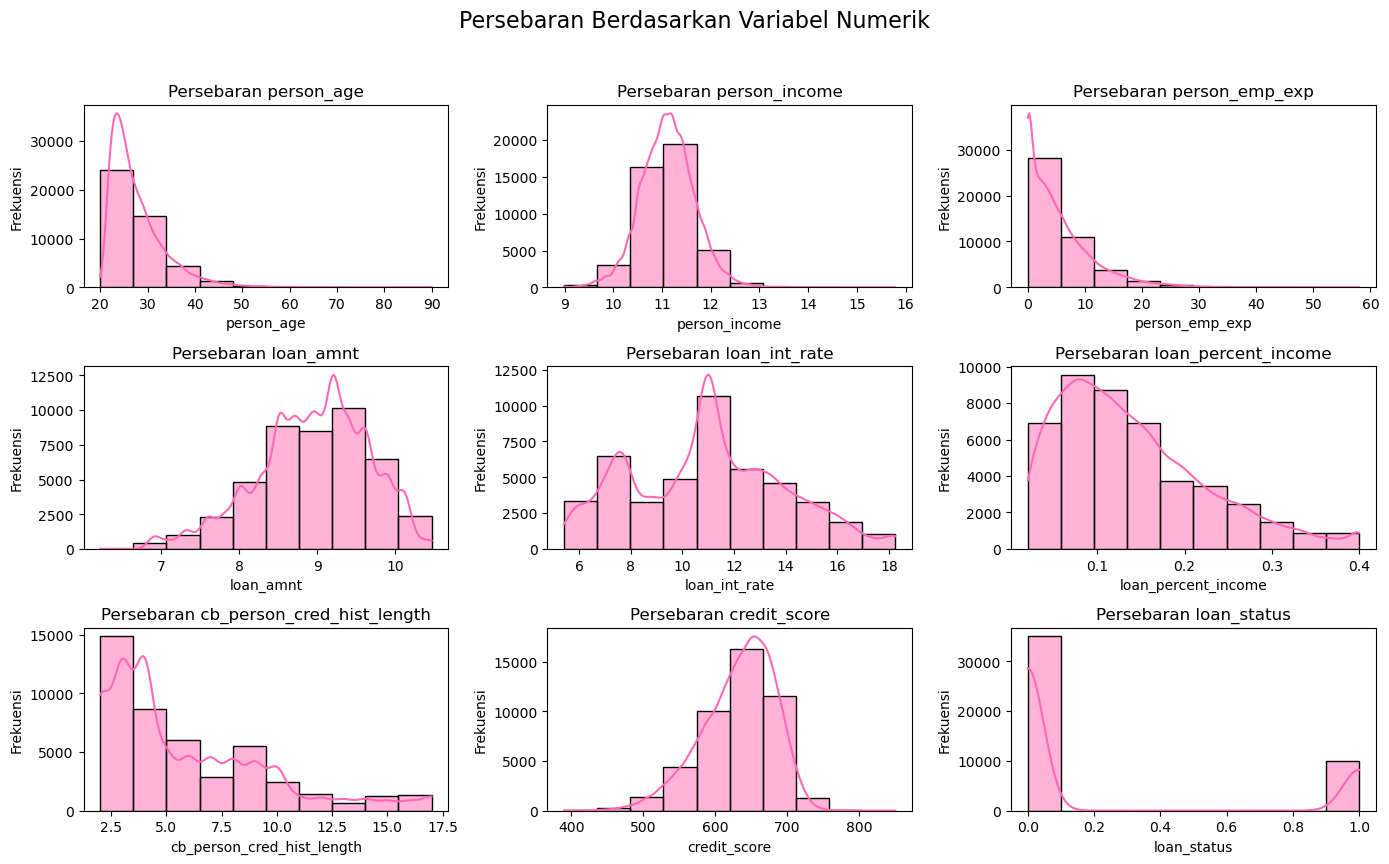

In [29]:
# Ambil kolom numerik
num_cols = df_clean.select_dtypes(include='number').columns

# Set ukuran figure
plt.figure(figsize=(14, 11))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)  # sesuaikan grid jika jumlah kolom berbeda
    sns.histplot(
        df_clean[col],
        bins=10,
        kde=True,
        color="hotpink",
        edgecolor="black"
    )
    plt.title(f"Persebaran {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")

plt.suptitle("Persebaran Berdasarkan Variabel Numerik", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [34]:
# Menambahkan label kolom approval
df_clean["approval_label"] = df_clean["loan_status"].map({1: "Approved", 0: "Rejected"})

# Cek dan mencetak data
print(df_clean.columns)
print(df_clean["approval_label"].value_counts())

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status',
       'approval_label'],
      dtype='object', name='Nama Kolom')
approval_label
Rejected    35000
Approved    10000
Name: count, dtype: int64


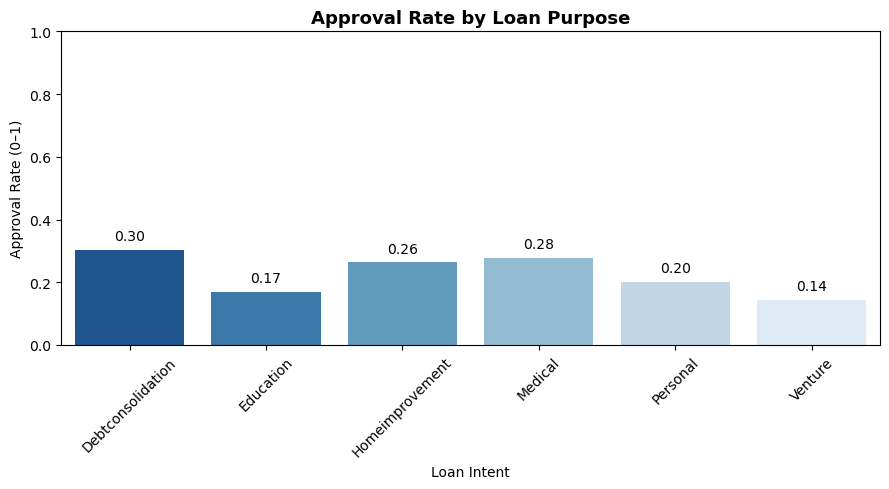

In [40]:
# Approval rate per loan intent
approval_rate = (
    df_clean
    .groupby("loan_intent")["loan_status"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(9,5))
ax = sns.barplot(data=approval_rate, x="loan_intent", y="loan_status", hue="loan_intent", palette="Blues_r", legend=False)

# anotasi angka rate
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', 
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom',
                fontsize=10,
                xytext=(0,5),
                textcoords='offset points')

plt.title("Approval Rate by Loan Purpose", fontsize=13, weight='bold')
plt.ylabel("Approval Rate (0–1)")
plt.xlabel("Loan Intent")
plt.xticks(rotation=45)
plt.ylim(0,1)

plt.tight_layout()
plt.show()

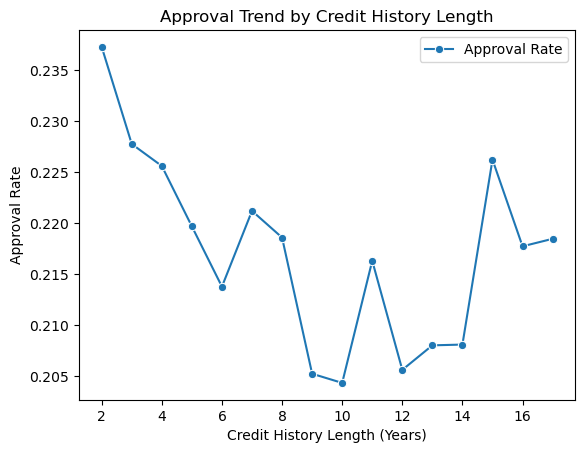

In [42]:
# Menghitung approval rate berdasarkan panjang credit history
trend = (
    df_clean.groupby("cb_person_cred_hist_length")["loan_status"]
    .mean()
    .reset_index()
)

plt.figure()
sns.lineplot(data=trend, x="cb_person_cred_hist_length", y="loan_status", marker="o", label="Approval Rate")

plt.title("Approval Trend by Credit History Length")
plt.xlabel("Credit History Length (Years)")
plt.ylabel("Approval Rate")
plt.legend()
plt.show()

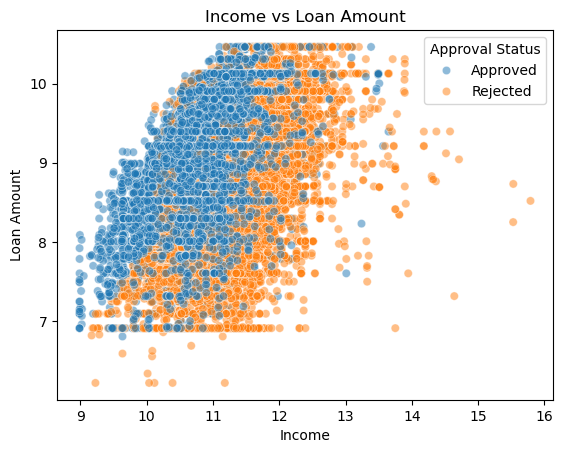

In [36]:
# Melihat hubungan income terhadap jumlah pinjaman yang diajukan
# serta keputusan approval bank
plt.figure()
sns.scatterplot(
    data=df_clean,
    x="person_income",
    y="loan_amnt",
    hue="approval_label",
    alpha=0.5
)

plt.title("Income vs Loan Amount")
plt.xlabel("Income")
plt.ylabel("Loan Amount")
plt.legend(title="Approval Status")
plt.show()

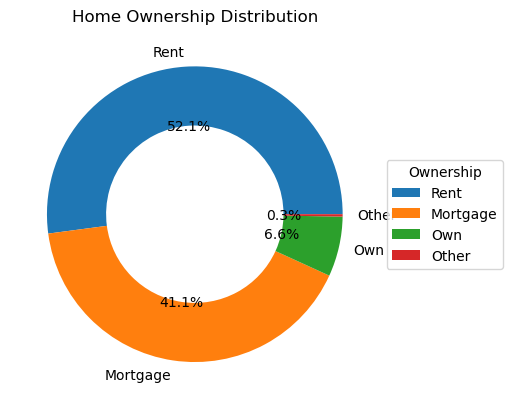

In [43]:
# Melihat komposisi status kepemilikan rumah dari seluruh applicant

# Menghitung jumlah masing-masing kategori kepemilikan rumah
counts = df_clean["person_home_ownership"].value_counts()

# Membuat donut chart
plt.figure()
plt.pie(
    counts,
    labels=counts.index,
    autopct="%1.1f%%",
    wedgeprops={"width":0.4}
)
plt.title("Home Ownership Distribution")
plt.legend(counts.index, title="Ownership", loc="center left", bbox_to_anchor=(1,0.5))
plt.show()